In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.utils.data as utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
dict_data_lot = unpickle('data_batch_1')
X = dict_data_lot[b'data']
y = np.asarray(dict_data_lot[b'labels']).astype(np.int64)
batch_files = ['data_batch_2','data_batch_3','data_batch_4','data_batch_5']

In [4]:
dict_data_lot = unpickle('test_batch')
X_test = dict_data_lot[b'data']
y_test = np.asarray(dict_data_lot[b'labels']).astype(np.int64)

In [5]:
for file in batch_files:
    dict_data_lot = unpickle(file)
    X = np.append(X,dict_data_lot[b'data'],axis=0)
    y = np.append(y,dict_data_lot[b'labels'],axis=0)  

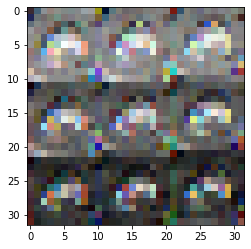

In [6]:
plt.imshow(X[0].reshape(32,32,3))

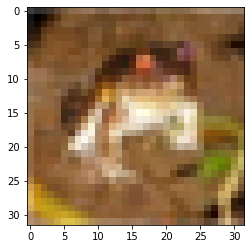

In [7]:
plt.imshow(X[0].reshape(3,32,32).transpose(1,2,0))

In [8]:
print("Start ="+str(datetime.now()))
max_depth_grid = [10,20,30,40]
accuracies = np.empty((len(max_depth_grid), 2))
for i, max_depth in enumerate(max_depth_grid):
    dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    dtree.fit(X, y)
    accuracies[i,0] = accuracy_score(y, dtree.predict(X))
    accuracies[i,1] = accuracy_score(y_test, dtree.predict(X_test))
print("End ="+str(datetime.now()))

Start =2019-12-06 20:30:36.362710
End =2019-12-06 20:34:36.594265


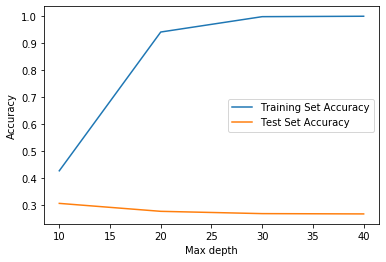

In [9]:
for i, str_set in enumerate(['Training Set', 'Test Set']):
    plt.plot(max_depth_grid, accuracies[:,i], label=str(str_set)+' Accuracy')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=40)

In [14]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

In [15]:
#dot_data = StringIO()
#export_graphviz(dtree, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

[Text(167.4, 195.696, 'X[2069] <= 145.5\ngini = 0.9\nsamples = 50000\nvalue = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000\n5000]'),
 Text(83.7, 152.208, 'X[2544] <= 144.5\ngini = 0.884\nsamples = 27222\nvalue = [1191, 2602, 3342, 3397, 3854, 3689, 4002, 2695, 1154\n1296]'),
 Text(41.85, 108.72, 'X[1552] <= 76.5\ngini = 0.875\nsamples = 20483\nvalue = [680, 1450, 2825, 2517, 3428, 2465, 3468, 2110, 628\n912]'),
 Text(20.925, 65.232, 'X[528] <= 140.5\ngini = 0.879\nsamples = 7136\nvalue = [280, 647, 992, 889, 1116, 899, 606, 1138, 176, 393]'),
 Text(10.4625, 21.744, '\n  (...)  \n'),
 Text(31.387500000000003, 21.744, '\n  (...)  \n'),
 Text(62.775000000000006, 65.232, 'X[2802] <= 132.5\ngini = 0.864\nsamples = 13347\nvalue = [400, 803, 1833, 1628, 2312, 1566, 2862, 972, 452\n519]'),
 Text(52.3125, 21.744, '\n  (...)  \n'),
 Text(73.2375, 21.744, '\n  (...)  \n'),
 Text(125.55000000000001, 108.72, 'X[752] <= 126.5\ngini = 0.882\nsamples = 6739\nvalue = [511, 1152, 517, 880, 426,

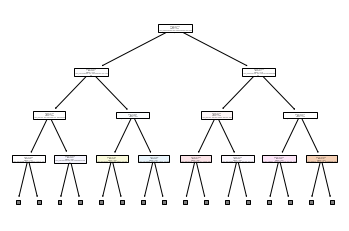

In [18]:
#No improvement in accuracy for decision tree.
tree.plot_tree(dtree,max_depth=3, filled=True) 

[Text(167.4, 181.2, 'X[2069] <= 145.5\ngini = 0.9\nsamples = 50000\nvalue = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000\n5000]'),
 Text(83.7, 108.72, 'X[2544] <= 144.5\ngini = 0.884\nsamples = 27222\nvalue = [1191, 2602, 3342, 3397, 3854, 3689, 4002, 2695, 1154\n1296]'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'X[2349] <= 144.5\ngini = 0.878\nsamples = 22778\nvalue = [3809, 2398, 1658, 1603, 1146, 1311, 998, 2305, 3846\n3704]'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

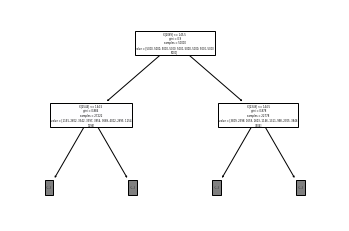

In [20]:
tree.plot_tree(dtree,max_depth=1, filled=True) 

In [21]:
# Check if CUDA is available
gpu_present = torch.cuda.is_available()
   
if gpu_present:
    print("Training can be done on a GPU...")
else:
    print("Training can only be done on a CPU...")

Training can only be done on a CPU...


In [22]:
#Tringing pytorch CNN

In [23]:
scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
scaler.fit(X)
X_rescaled = scaler.transform(X).astype(np.float32)
X_test_rescaled = scaler.transform(X_test).astype(np.float32)

In [24]:
train_img_tensor_x = torch.from_numpy(X_rescaled.reshape(50000,3,32,32))
train_img_tensor_y = torch.from_numpy(y)
test_img_tensor_x = torch.from_numpy(X_test_rescaled.reshape(10000,3,32,32))
test_img_tensor_y = torch.from_numpy(y_test)

trainset = utils.TensorDataset(train_img_tensor_x,train_img_tensor_y)
testset = utils.TensorDataset(test_img_tensor_x,test_img_tensor_y)

trainloader = utils.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testloader = utils.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

In [25]:
#Neural Network for a three channel image
class CIFAR_CNN_Net(nn.Module):
    def __init__(self):
        super(CIFAR_CNN_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
CIFAR_CNN = CIFAR_CNN_Net()

# Move tensors to GPU is CUDA is available
if gpu_present:
    CIFAR_CNN.cuda()

In [26]:
#Let’s use a Classification Cross-Entropy loss and SGD with momentum.
#Define a Loss function and optimizer

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CIFAR_CNN.parameters(), lr=0.001, momentum=0.9)

In [28]:
#Train the network

In [29]:
model_path = 'CIFAR-10-CNN-MODEL.pt'
num_epochs = 10

for epoch in range(1, num_epochs+1):  # loop over the dataset multiple times

    training_loss = 0.0
    CIFAR_CNN.train()
    for i, data in enumerate(trainloader, 0):
        

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        if gpu_present:
            inputs, labels = inputs.cuda(), labels.cuda()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = CIFAR_CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        training_loss += loss.item()

#        if i % 2000 == 1999:    # print every 2000 mini-batches
#            print('[%d, %5d] loss: %.3f' %
#                  (epoch + 1, i + 1, running_loss / 2000))
#            running_loss = 0.0

    training_loss = training_loss/len(trainloader.dataset)
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, training_loss))    
    
print('Finished Training....')
torch.save(CIFAR_CNN.state_dict(), model_path)
print('Saved model parameters to disk.')

Epoch: 1 	Training Loss: 0.405719
Epoch: 2 	Training Loss: 0.292904
Epoch: 3 	Training Loss: 0.247902
Epoch: 4 	Training Loss: 0.220349
Epoch: 5 	Training Loss: 0.202290
Epoch: 6 	Training Loss: 0.188564
Epoch: 7 	Training Loss: 0.176511
Epoch: 8 	Training Loss: 0.166517
Epoch: 9 	Training Loss: 0.158491
Epoch: 10 	Training Loss: 0.150666
Finished Training....
Saved model parameters to disk.


In [30]:
#Testing the network

In [31]:
CIFAR_CNN.eval()
total_correct = 0
total_images = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # move tensors to GPU if CUDA is available
        if gpu_present:
            images, labels = images.cuda(), labels.cuda()     
        outputs = CIFAR_CNN(images)
        # convert output probabilities to predicted class
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 74.84%


In [32]:
#Activation Maximization

In [33]:
CIFAR_CNN.load_state_dict(torch.load('CIFAR-10-CNN-MODEL.pt'))

<All keys matched successfully>

In [34]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


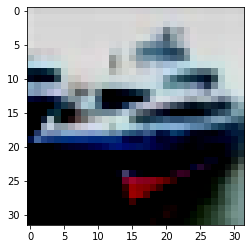

In [35]:
y = example_data[1].numpy()
plt.imshow(y.reshape(3,32,32).transpose(1,2,0))

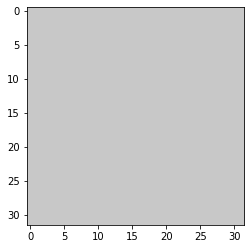

In [36]:
random_img = np.uint8(np.random.uniform(200,200, (32,32,3)))/255
random_img_tensor = torch.from_numpy(random_img.reshape(1,3,32,32).astype(np.float32))
random_img_tensor.requires_grad = True
plt.imshow(random_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


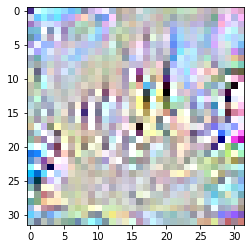

In [37]:
CIFAR_CNN.eval()
for i in range(25):
    if gpu_present:
        random_img_tensor = random_img_tensor.cuda()
    output = CIFAR_CNN(random_img_tensor)
    output[0][8].backward() #Ship has class 8
    random_img_tensor.data += 0.2*random_img_tensor.grad.data
    random_img_tensor.grad.data.zero_()

if gpu_present:
    plt.imshow(random_img_tensor.detach().cpu().numpy().reshape(3,32,32).transpose(1,2,0))
else:    
    plt.imshow(random_img_tensor.detach().numpy().reshape(3,32,32).transpose(1,2,0))    

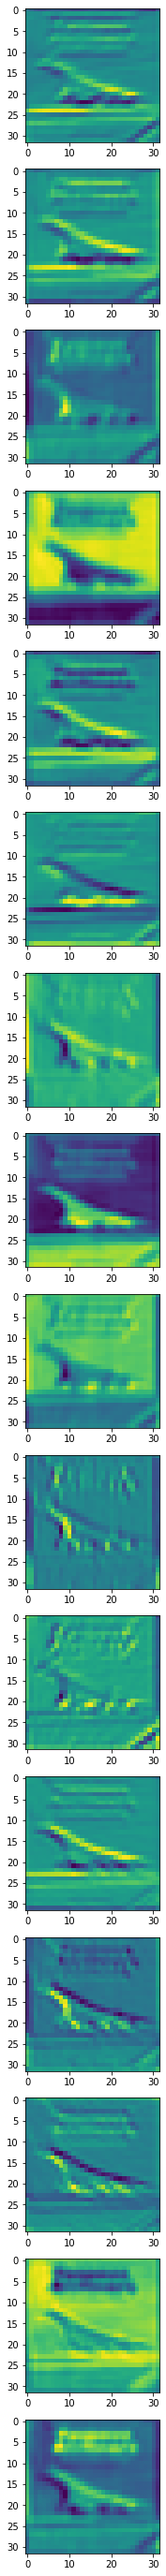

In [38]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

CIFAR_CNN.conv1.register_forward_hook(get_activation('conv1'))
image = example_data[3]
image.unsqueeze_(0)
output = CIFAR_CNN(image)
act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0))
fig.set_size_inches(50,50)
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])   

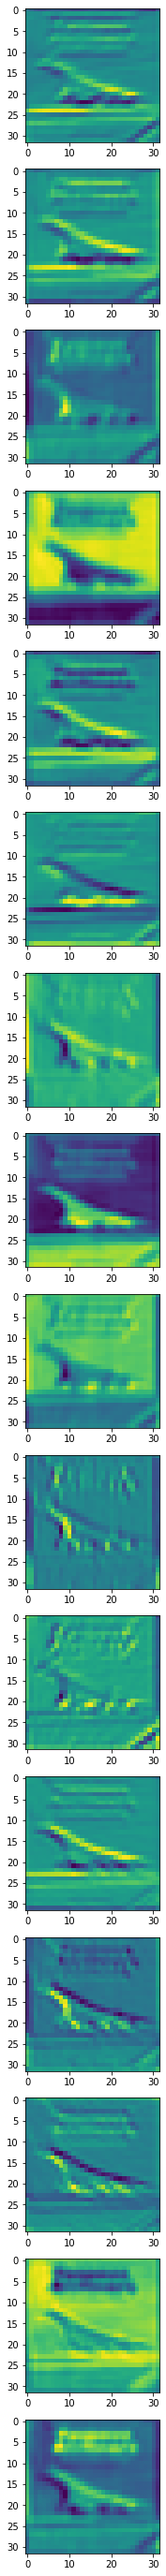

In [39]:
CIFAR_CNN.conv1.register_forward_hook(get_activation('conv3'))
image = example_data[3]
image.unsqueeze_(0)
output = CIFAR_CNN(image)
act = activation['conv3'].squeeze()
fig, axarr = plt.subplots(act.size(0))
fig.set_size_inches(50,50)
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])  